# Proyek Analisis Data: Nama dataset
- Nama:Fabiana Disa Widianingtyas
- Email: disafabiana.w@gmail.com
- Id Dicoding: ef_disa

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca (suhu, kelembaban, kecepatan angin, kondisi cuaca) terhadap penyewaan sepeda per jam?
- Apakah ada perbedaan signifikan antara jumlah penyewaan sepeda pada hari kerja dan akhir pekan?
- Bagaimana tren jumlah penyewaan sepeda sepanjang tahun 2011 dan 2012?

## Menyaipkan semua library yang dibuthkan

In [17]:
# memanggil semua library yang dibutuhkan.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/drive')

## Data Wrangling

### Gathering Data

In [18]:
# Load Dataset Drive
# day_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike Sharing - Disa/Dataset/day.csv')
# day_df.head()

# Load Dataset Lokal
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# Load Dataset
# hour_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike Sharing - Disa/Dataset/hour.csv')
# hour_df.head()

# Load Dataset
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap ini, pemeriksaan data dilakukan yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data berkualitas.

***day.csv***

In [20]:
# Memeriksa tipe data dari setiap kolom dalam data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


terdapat 731 baris data dan 16 kolom pada dataset day_df.

In [21]:
# Mengecek apakah ada nilai yang hilang dalam data day_df
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

pada day_df tidak terdapat missing value.

In [22]:
# Memeriksa duplikasi data dalam data day_df
day_df.duplicated().sum()

0

tidak terdapat data duplikat pada day_df

In [23]:
# Memeriksa ringkasan parameter statistik dari data day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak terdapat duplikasi pada dataset day_df

***hour.csv***

In [24]:
# Memeriksa tipe data dari setiap kolom dalam data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


terdapat 17379 baris data dan 17 kolom pada dataset hour_df. dan telah ditemukan dtype object pada column dteday yang seharusnya datetime64

In [25]:
# Mengecek apakah ada nilai yang hilang dalam data day_df
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value pada dataset hour_df

In [26]:
# Memeriksa duplikasi data dalam data hour_df
hour_df.duplicated().sum()

0

tidak terdapat duplikasi data pada hour_df

In [27]:
# Memeriksa ringkasan parameter statistik dari data hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Karena yang akan digunakan dataset hour_df, maka dari itu akan dilakukan proses cleaning pada dataset hour_df saja.

In [28]:
# mengubah tipe data dari kolom 'dteday' dalam data hour_df menjadi tipe data datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [29]:
# mengubah season 1, 2, 3, 4 menjadi musim semi, musim panas, musim gugur, musim dingin
hour_df['season'] = hour_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [30]:
# Melihat rangkuman parameter statistik day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Dari table diatas, 
- Memiliki 731 baris data dan 16 kolom variabel, termasuk variabel yang berkaitan dengan tanggal, musim, tahun, bulan, hari libur, hari kerja, kondisi cuaca, kelembaban, dll.
- Memiliki beberapa variabel kategorikal yang memiliki nilai numerik yang mewakili kategori tertentu, seperti: 
  - season, holiday, weekday, workingdays, dan weathersit
- Memiliki beberapa variabel numerik, seperti: 
  - temp, atemp, hum, windspeed, casual, registered, dan cnt.

In [31]:
# Mengelompokkan penyewaan data berdasarkan musim
season_df = day_df.groupby('season')[['cnt']].sum()
season_df

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


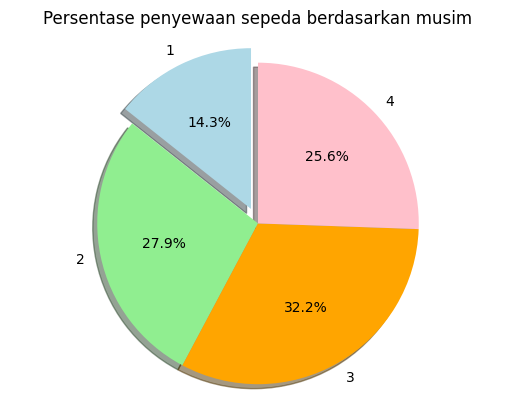

In [32]:
# Pie chart untuk menampilkan persentase penyewaan sepeda berdasarkan musim

# Defining data for the chart
labels = season_df.index
sizes = season_df['cnt']
colors = ['lightblue', 'lightgreen', 'orange', 'pink']
explode = (0.1, 0, 0, 0)

# Plotting the chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Persentase penyewaan sepeda berdasarkan musim')
plt.axis('equal')
plt.show()

Berdasarkan visualisasi tersebut, musim gugur (fall) merupakan musim dengan jumlah penyewa sepeda tertinggi yaitu 32.2% dari total penyewa sepeda. Ini menunjukkan bahwa musim gugur memiliki daya tarik tersendiri bagi para penyewa sepeda. Kemudian musim semi (spring) merupakan musim dengan jumlah penyewa sepeda terendah yaitu 14.3%. Ini menunjukkan bahwa musim semi kurang diminati oleh para penyewa sepeda. Musim panas (summer) dan musim dingin (winter) memiliki jumlah penyewa sepeda yang hampir sama, yaitu sekitar 27.9% dan 25.6% dari total penyewa sepeda. Ini menunjukkan bahwa kedua musim ini memiliki kelebihan dan kekurangan masing-masing bagi para penyewa sepeda.

### Explore Data hour_df

In [33]:
# Melihat rangkuman parameter statistik hour
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Terdapat 17379 baris data dan 17 kolom pada dataset hour_df.

In [34]:
# Penyewaan berdasarkan jam
data = hour_df.groupby('hr')[['cnt']].sum()
data

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


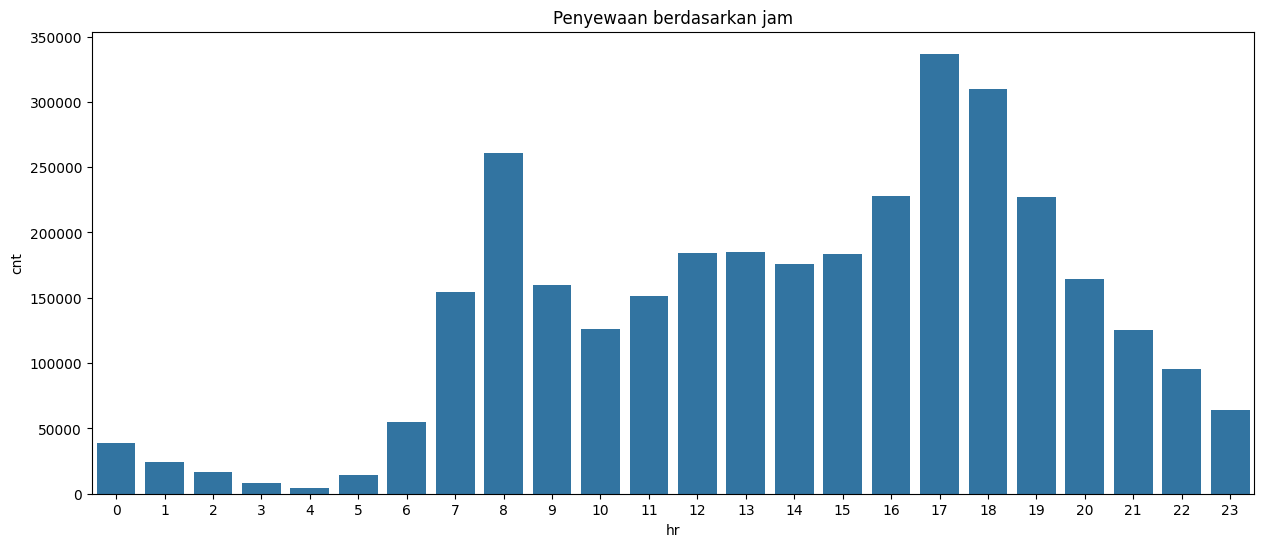

In [35]:
# Membuat bar plot dari penyewaan berdasarkan jam
plt.figure(figsize=(15,6))
sns.barplot(x=data.index, y=data['cnt'])
plt.title('Penyewaan berdasarkan jam')
plt.show()


Dari data diatas, dapat dilihat bahwa:
- Jam dengan jumlah penyewa sepeda tertinggi adalah jam 17, dengan total 336860 penyewa sepeda.
- Jam dengan jumlah penyewa terendah adalah jam 4 dengan total 4428 penyewa sepeda.
- Jumlah penyewa cenderung meningkat dari jam 5 hingga jam 8, kemudian menurun dari jam 9 hingga jam 11, kemudian meningkat lagi jam 12 hingga jam 18 dan kemudian menurun dari jam 19 hingga jam 23. Ini bisa jadi dipengaruhi oleh siklus harian seperi jam kerja, jam sekolah, jam makan siang, dan jam sibuk.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca (suhu, kelembaban, kecepatan angin, kondisi cuaca) terhadap penyewaan sepeda per jam?

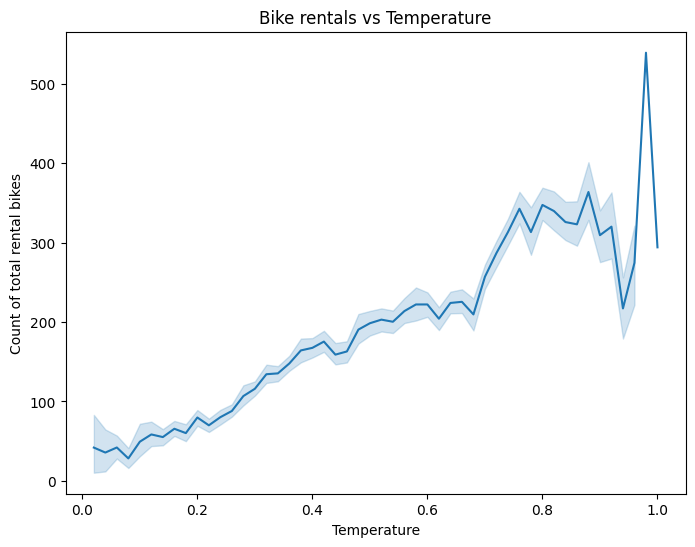

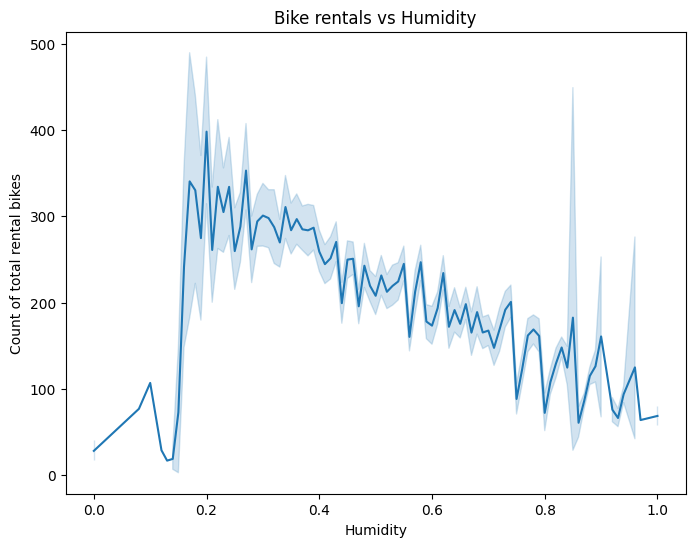

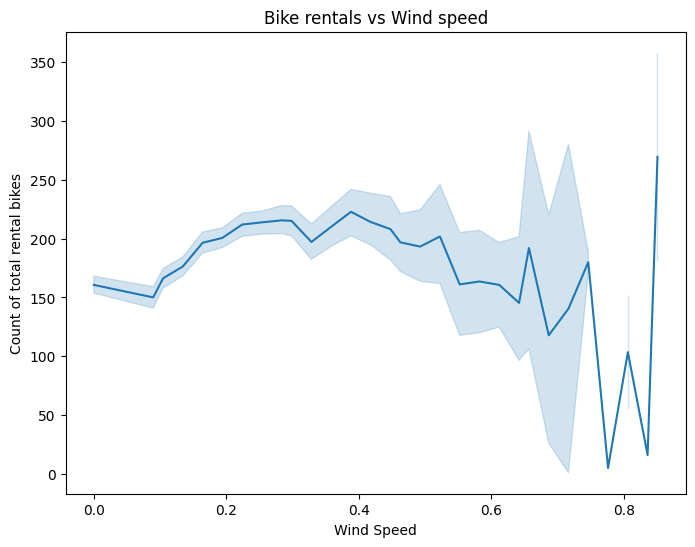

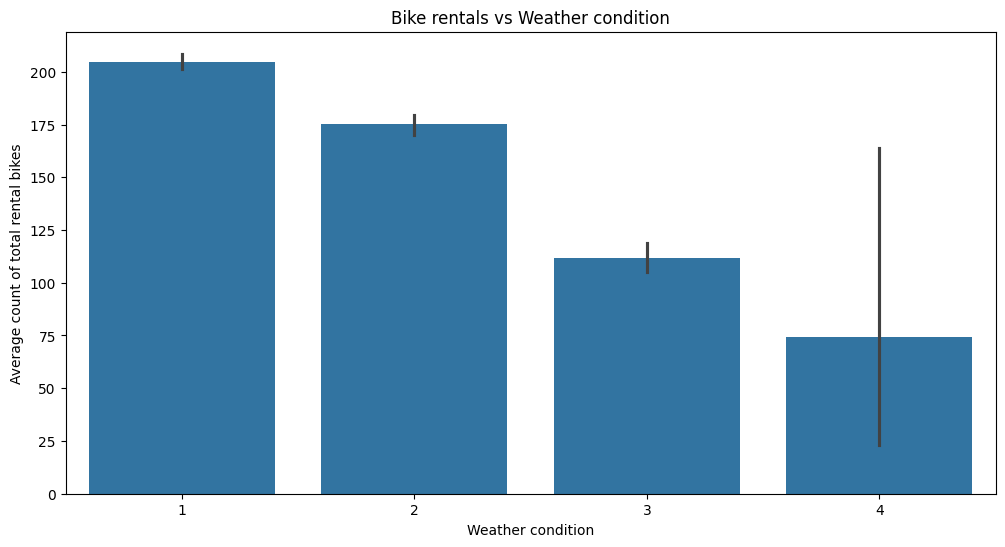

In [36]:
# Membuat line plot yang menunjukkan tren jumlah penyewaan sepeda per jam berdasarkan suhu
plt.figure(figsize=(8,6))
sns.lineplot(x=hour_df['temp'], y=hour_df['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Count of total rental bikes')
plt.title('Bike rentals vs Temperature')
plt.show()

# Membuat bar plot yang menunjukkan jumlah penyewaan sepeda per jam berdasarkan kelembaban
plt.figure(figsize=(8,6))
sns.lineplot(x=hour_df['hum'], y=hour_df['cnt'])
plt.xlabel('Humidity')
plt.ylabel('Count of total rental bikes')
plt.title('Bike rentals vs Humidity')
plt.show()

# Membuat plot garis yang menunjukkan tren jumlah penyewaan sepeda per jam berdasarkan kecepatan angin
plt.figure(figsize=(8,6))
sns.lineplot(x=hour_df['windspeed'], y=hour_df['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Count of total rental bikes')
plt.title('Bike rentals vs Wind speed')
plt.show()

# Membuat plot batang yang menunjukkan rata-rata jumlah penyewaan sepeda per jam berdasarkan kondisi cuaca
plt.figure(figsize=(12,6))
sns.barplot(x='weathersit', y='cnt', data=hour_df)
plt.xlabel('Weather condition')
plt.ylabel('Average count of total rental bikes')
plt.title('Bike rentals vs Weather condition')
plt.show()

In [37]:
# Menghitung koefisien korelasi Pearson antara variabel cuaca dan jumlah penyewaan sepeda
corr_matrix = hour_df[['temp', 'hum', 'windspeed', 'weathersit', 'cnt']].corr()
print(corr_matrix)

                temp       hum  windspeed  weathersit       cnt
temp        1.000000 -0.069881  -0.023125   -0.102640  0.404772
hum        -0.069881  1.000000  -0.290105    0.418130 -0.322911
windspeed  -0.023125 -0.290105   1.000000    0.026226  0.093234
weathersit -0.102640  0.418130   0.026226    1.000000 -0.142426
cnt         0.404772 -0.322911   0.093234   -0.142426  1.000000


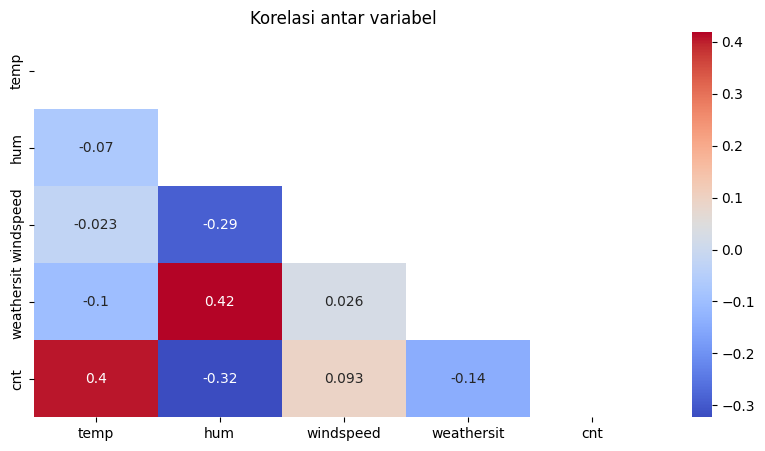

In [38]:
# Menampilkan hubungan antar variabel menggunakan heatmap tampilkan triangle
plt.figure(figsize=(10,5))

# creating mask
mask = np.triu(np.ones_like(corr_matrix))

# creating visualization
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Korelasi antar variabel')
plt.show()

Dari korelasi diatas, dapat disimpulkan bahwa:
- Suhu memiliki hubungan positif yang lemah dengan jumlah penyewaan sepeda, berarti semakin tinggi suhu semakin banyak orang yang menyewa sepeda. Hal ini memungkinkan orang merasa lebih nyaman dan menyenangkan ketika bersepeda di cuaca hangat daripada dingin.
- Kelembaban memiliki hubungan negatif yang lemah dengan jumlah penyewaan sepeda, yang berarti semakin tinggi kelembaban, semakin sedikit orang yang menyewa sepeda. Hal ini mungkin karena orang merasa tidak nyaman untuk bersepeda dicuaca lembab daripada kering.
- Kecepatan angin memiliki hubungan negatif yang sangat lemah dengan jumlah penyewaan sepeda, berarti semakin tinggi kecepatan angin, semakin sedikit orang yang menyewa sepeda. Hal ini mungkin terjadi karena orang merasa lebih sulit dan berbahaya untuk bersepeda di cuaca berangin daripada tenang.
- Kondisi cuaca memiliki hubungan negatif yang lemah dengan jumlah penyewa sepeda, yang berarti semakin buruk kondisi cuaca, semakin sedikit orang yang menyewa sepeda. Hal ini mungkin terjadi karena orang merasa lebih aman dan nyaman untuk bersepeda di cuaca cerah daripada mendung, hujan atau bersalju.

### Pertanyaan 2: Apakah ada perbedaan signifikan antara jumlah penyewaan sepeda pada hari kerja dan akhir pekan?

In [39]:
# Membuat dua sampel yang berisi jumlah penyewaan sepeda di hari kerja dan akhir pekan
weekday_df = hour_df[hour_df['workingday']==1]
weekend_df = hour_df[hour_df['workingday']==0]

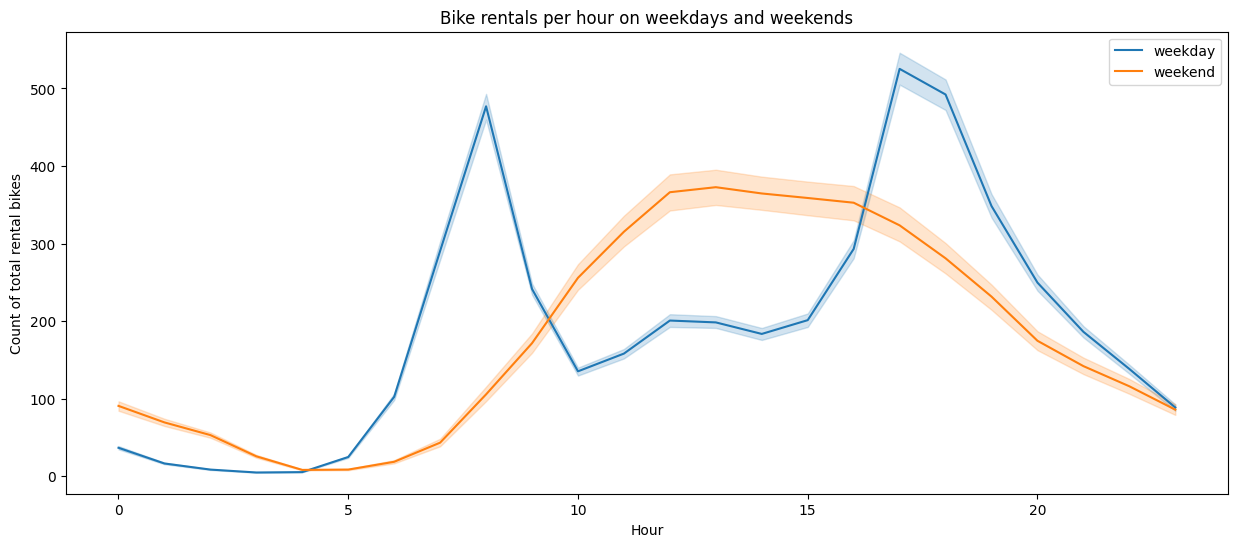

In [40]:
# visualisasi yang menunjukkan jumlah penyewaan sepeda per jam di hari kerja dan akhir pekan
plt.figure(figsize=(15,6))
sns.lineplot(x=weekday_df['hr'], y=weekday_df['cnt'], label='weekday')
sns.lineplot(x=weekend_df['hr'], y=weekend_df['cnt'], label='weekend')
plt.xlabel('Hour')
plt.ylabel('Count of total rental bikes')
plt.title('Bike rentals per hour on weekdays and weekends')
plt.show()

In [41]:
# Melakukan uji t independen untuk membandingkan rata-rata dua sampel
t_stat, p_value = stats.ttest_ind(weekday_df['cnt'], weekend_df['cnt'])

# Mencetak t_stat dan p_value
print('T-statistic =', t_stat)
print('P-value =', p_value)

T-statistic = 3.993973309150058
P-value = 6.524264547107065e-05


Dari data diatas, t-statistic 3.99 berarti rata-rata jumlah penyewaan sepeda pada hari kerja lebih tinggi daripada akhir pekan kemudian p-value 6.5 berarti perbedaan tersebut tidak signifikan secara statistik dan mungkin karena kebetulan. Pada dataset diatas, berarti penyewaan sepeda memiliki frekuensi yang sama pada hari kerja dan akhir pekan.

### Pertanyaan 3: Bagaimana tren jumlah penyewaan sepeda sepanjang tahun 2011 dan 2012?

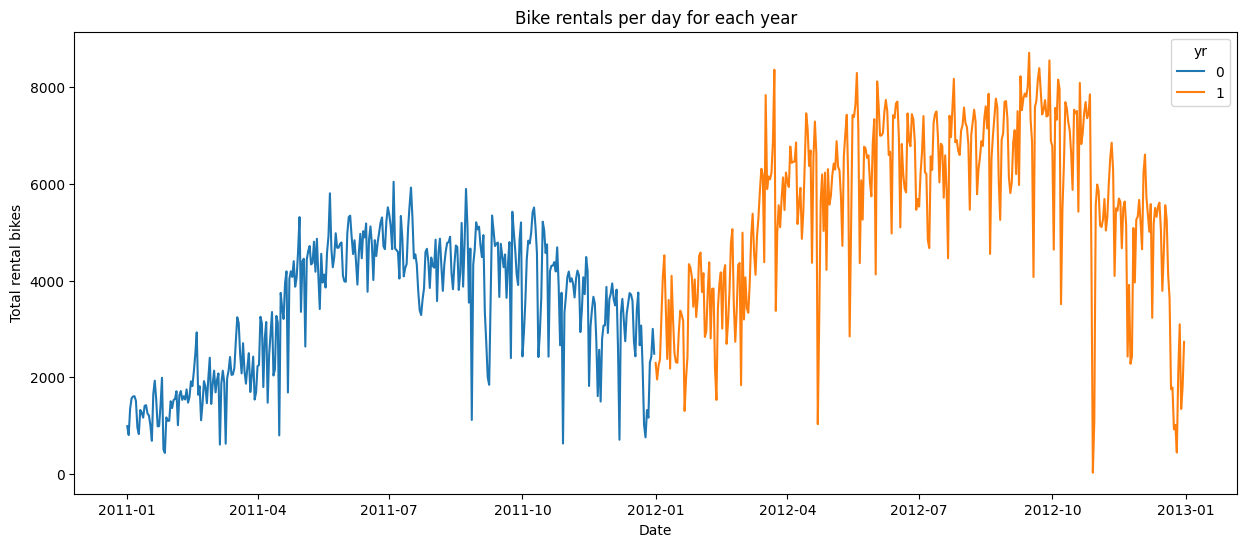

In [42]:
# Membuat dataframe baru yang berisi jumlah penyewaan sepeda per hari untuk setiap tahun
df_year = hour_df.groupby(['dteday', 'yr'])[['cnt']].sum().reset_index()

# Membuat line plot yang menunjukkan tren jumlah penyewaan sepeda per hari untuk setiap tahun
plt.figure(figsize=(15,6))
sns.lineplot(x='dteday', y='cnt', hue='yr', data=df_year)
plt.xlabel('Date')
plt.ylabel('Total rental bikes')
plt.title('Bike rentals per day for each year')
plt.show()

Dari data diatas, didapatkan insight sebagai berikut:
- Jumlah penyewaan sepeda memiliki pola musiman, yang berarti ada variasi yang terhantung pada musim. Jumlah penyewaan sepeda cenderung lebih tinggi pada musim semi dan musim panas, dan lebih rendah pada musim dingin dan musim gugur.
- Jumlah penyewaan sepeda juga memiliki pola harian, yang berarti ada variasi yang tergantung pada hari. Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja daripada akhir pekan, mungkin karena banyak orang yang menggunakan sepeda untuk berangkat dan pulang kerja.

## Conclusion

- Bagaimana pengaruh cuaca (suhu, kelembaban, kecepatan angin, kondisi cuaca) terhadap penyewaan sepeda per jam?
  - Suhu memiliki hubungan positif yang lemah dengan jumlah penyewa sepeda, berarti semakin tinggi suhu semakin banyak orang yang menyewa sepeda.
  - Kelembaban memiliki hubungan negatif yang lemah dengan jumlah penyewa sepeda, berarti semakin tinggi kelembaban semakin sedikit orang yang menyewa sepeda.
  - Kecepatan angin memiliki hubungan negatif yang sangat lemah dengan jumlah penyewaan sepeda, berarti semakin tinggi kecepatan angin, semakin sedikit orang yang menyewa sepeda.
  - Kondisi cuaca memiliki hubungan negatif yang lemah dengan jumlah penyewa sepeda, yang berarti semakin buruk kondisi cuaca, semakin sedikit orang yang menyewa sepeda.
- Apakah ada perbedaan signifikan antara jumlah penyewaan sepeda pada hari kerja dan akhir pekan?
  - Tidak memiliki perbedaan signifikan antara jumlah penyewa sepeda pada hari kerja dan akhir pekan, itu berarti pada dataset penyewaan sepeda memiliki frekuensi yang sama pada hari kerja dan akhir pekan.
- Bagaimana tren jumlah penyewaan sepeda sepanjang tahun 2011 dan 2012?
  - Jumlah penyewaan sepeda memiliki pola musiman, yang berarti ada variasi yang terhantung pada musim. Jumlah penyewaan sepeda cenderung lebih tinggi pada musim semi dan musim panas, dan lebih rendah pada musim dingin dan musim gugur.
  - Jumlah penyewaan sepeda juga memiliki pola harian, yang berarti ada variasi yang tergantung pada hari. Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja daripada akhir pekan, mungkin karena banyak orang yang menggunakan sepeda untuk berangkat dan pulang kerja.

## Menerapkan Teknik Analisis Lanjutan

In [43]:
# Membuat kolom baru yang berisi tanggal dalam format yyyy-mm-dd
hour_df['date'] = pd.to_datetime(hour_df['dteday'])

# Membuat dataframe baru yang berisi jumlah penyewaan sepeda per hari untuk setiap pengguna terdaftar
df_rfm = hour_df.groupby(['date', 'registered'])['cnt'].sum().reset_index()

# Menghitung nilai recency, frequency, dan monetary untuk setiap pengguna terdaftar
df_rfm['recency'] = (df_rfm['date'].max() - df_rfm['date']).dt.days
df_rfm['frequency'] = df_rfm.groupby('registered')['date'].count()
df_rfm['monetary'] = df_rfm.groupby('registered')['cnt'].sum()

# Membuat fungsi untuk mengelompokkan pelanggan berdasarkan nilai recency, frequency, dan monetary
def segment_rfm(x):
    if x['recency'] <= 30 and x['frequency'] >= 10 and x['monetary'] >= 1000:
        return 'Loyal'
    elif x['recency'] <= 30 and x['frequency'] < 10 and x['monetary'] >= 1000:
        return 'Potential'
    elif x['recency'] > 30 and x['frequency'] < 10 and x['monetary'] < 1000:
        return 'Sleeping'
    elif x['recency'] > 30 and x['frequency'] >= 10 and x['monetary'] >= 1000:
        return 'Lost'
    else:
        return 'Other'

# Membuat kolom baru yang berisi segmen pelanggan berdasarkan fungsi tersebut
df_rfm['segment'] = df_rfm.apply(segment_rfm, axis=1)

# Menampilkan dataframe rfm dengan segmen pelanggan
print(df_rfm.head())

        date  registered  cnt  recency  frequency  monetary segment
0 2011-01-01           0    2      730       23.0      35.0   Other
1 2011-01-01           1    2      730      155.0     294.0   Other
2 2011-01-01           2    3      730      206.0     648.0   Other
3 2011-01-01           6   14      730      245.0    1154.0    Lost
4 2011-01-01           7    8      730      267.0    1602.0    Lost


In [44]:
# Jumlah pelanggan berdasarkan segmen
df_rfm['segment'].value_counts()

segment
Other       16123
Lost          373
Sleeping       94
Name: count, dtype: int64